#### Create DataFrames for February, March, and April 2016 Wikipedia Clicksteam data

In [6]:
import pandas as pd

In [7]:
feb_df = pd.read_csv("/Users/ZareenFarooqui/Dropbox/Programming/2016_02_en_clickstream.tsv", sep='\t', header=0)

In [8]:
march_df = pd.read_csv("/Users/ZareenFarooqui/Dropbox/Programming/2016_03_clickstream.tsv", sep='\t', header=0)

In [9]:
april_df = pd.read_csv("/Users/ZareenFarooqui/Dropbox/Programming/2016_04_en_clickstream.tsv", sep='\t', header=0)

In [13]:
feb_df.head()

,prev,curr,type,n
0,Wild_Bill_Hickok,"Deadwood,_South_Dakota",link,182
1,$100,United_States_dollar,link,18
2,(Ghost)_Riders_in_the_Sky:_A_Cowboy_Legend,Dezperadoz,link,11
3,(Ghost)_Riders_in_the_Sky:_A_Cowboy_Legend,Stan_Jones_(songwriter),link,517
4,(Hey_You)_The_Rock_Steady_Crew,Rock_Steady_Crew,link,106


In [14]:
feb_df.rename(columns = {'n':'feb-n'}, inplace = True)

In [16]:
march_df.rename(columns = {'n':'march-n'}, inplace = True)

In [17]:
april_df.rename(columns = {'n':'april-n'}, inplace = True)

In [18]:
feb_df.groupby('curr').sum().sort_values('feb-n', ascending=False).head()

,feb-n
curr,
Main_Page,533239667
Web_scraping,30530158
Donald_Trump,8226748
Deadpool_(film),6701168
XHamster,6198139


In [19]:
march_df.groupby('curr').sum().sort_values('march-n', ascending=False).head()

,march-n
curr,
Main_Page,499824019
Donald_Trump,21247127
Batman_v_Superman:_Dawn_of_Justice,6696171
XHamster,6378559
Java_(programming_language),3398251


In [20]:
april_df.groupby('curr').sum().sort_values('april-n', ascending=False).head()

,april-n
curr,
Main_Page,508529026
Prince_(musician),17429179
XHamster,6152164
The_Adventures_of_Tintin,4099890
Batman_v_Superman:_Dawn_of_Justice,3816183


# Can I accurately predicted the success of the 2016 presidential candidates based solely on the number of hits to each candidates Wikipedia page?

In [ ]:
wiki_df = 

In [21]:
# all candidates still running in Feb 2016
politicians_feb_list = ['Ben_Carson', 'Bernie_Sanders', 'Carly_Fiorina', 'Chris_Christie', 'Donald_Trump', 
                       'Hillary_Clinton', 'Jeb_Bush', 'Jim_Gilmore', 'John_Kasich', 'Marco_Rubio', "Martin_O'Malley", 
                        'Mike_Huckabee', 'Rand_Paul', 'Rick_Santorum', 'Ted_Cruz']

In [22]:
politicians_feb_df = pd.DataFrame()

for name in politicians_feb_list:
    politicians_feb_df = pd.concat([politicians_feb_df, 
                              feb_df[feb_df.curr == name].groupby('curr').sum()])

#### Here are the presidential candidates in February 2016,  sorted by descending number of hits to their Wikipedia page in February:

In [23]:
politicians_feb_df.sort_values('feb-n', ascending=False)

,feb-n
curr,
Donald_Trump,8226748
Bernie_Sanders,3505934
Ted_Cruz,2231785
Marco_Rubio,1791416
Hillary_Clinton,1223988
John_Kasich,919589
Jeb_Bush,887982
Ben_Carson,502375
Chris_Christie,256310


#### In February 2016, the following candidates dropped out of the race: 
* Martin O'Malley
* Mike Huckabee
* Rand Paul
* Rick Santorum
* Carly Fiorina
* Chris Christie
* Jeb Bush
* Jim Gilmore


#### Indeed, of the 10 least popular candidates, 8  dropped out.

In [24]:
# all candidates still running in March 2016
politicians_march_list = ['Ben_Carson', 'Bernie_Sanders', 'Donald_Trump', 'Hillary_Clinton',
                          'John_Kasich', 'Marco_Rubio',  'Ted_Cruz']

In [25]:
politicians_march_df = pd.DataFrame()

for name in politicians_march_list:
    politicians_march_df = pd.concat([politicians_march_df, 
                              march_df[march_df.curr == name] .groupby('curr').sum()])

#### Here are the presidential candidates in March 2016,  sorted by descending number of hits to their Wikipedia page in March:

In [26]:
politicians_march_df.sort_values('march-n', ascending=False)

,march-n
curr,
Donald_Trump,21247127
Bernie_Sanders,1966194
Ted_Cruz,1658620
Hillary_Clinton,1440389
John_Kasich,1178176
Marco_Rubio,1014123
Ben_Carson,415918


#### In March 2016, the following candidates dropped out of the race:
* Ben Carson
* Marco Rubio


#### Again, the 2 least popular candidates on Wikipedia dropped out of the race.

In [27]:
# all candidates still running in April 2016
politicians_april_list = ['Bernie_Sanders', 'Donald_Trump', 'Hillary_Clinton', 'John_Kasich', 'Ted_Cruz']

In [28]:
politicians_april_df = pd.DataFrame()

for name in politicians_april_list:
    politicians_april_df = pd.concat([politicians_april_df, 
                              april_df[april_df.curr == name].groupby('curr').sum()])

#### Here are the presidential candidates in April 2016,  sorted by descending number of hits to their Wikipedia page in April:

In [29]:
politicians_april_df.sort_values('april-n', ascending=False)

,april-n
curr,
Donald_Trump,3278321
Bernie_Sanders,1285179
Hillary_Clinton,870325
Ted_Cruz,819175
John_Kasich,392893


#### No candidates dropped out of the race in April 2016. 

#### However, in May 2016 the following candidates dropped out of the race:
* Ted Cruz
* John Kasich

### Indeed, Wikipedia Clickstream data has been an accurate tool to measure success of candidates  up to April 2016 for the Presidential Election.

# Facebook vs. Twitter vs. Google 

Which platform drove most traffic to the candidates pages? (using March 2016 data b/c it differentiates between facebook/twitter/google)

In [30]:
# all candidates still running in May 2016
politicians_current_list = ['Bernie_Sanders', 'Donald_Trump', 'Hillary_Clinton']

In [31]:
fb_df = pd.DataFrame()

for name in politicians_current_list:
    fb_df = pd.concat([fb_df, 
                      march_df[(march_df['curr'] == name) &
                               (march_df['prev'] == "other-facebook")]])

In [32]:
fb_df.sort_values('march-n', ascending=False)

,prev,curr,type,march-n
17113887,other-facebook,Donald_Trump,external,3024676
2622838,other-facebook,Bernie_Sanders,external,12183
6329890,other-facebook,Hillary_Clinton,external,1638


In [33]:
twitter_df = pd.DataFrame()

for name in politicians_current_list:
    twitter_df = pd.concat([twitter_df, 
                      march_df[(march_df['curr'] == name) &
                               (march_df['prev'] == "other-twitter")]])

In [34]:
twitter_df.sort_values('march-n', ascending=False)

,prev,curr,type,march-n
8065526,other-twitter,Donald_Trump,external,269423
13793075,other-twitter,Bernie_Sanders,external,1397
17503934,other-twitter,Hillary_Clinton,external,657


In [35]:
google_df = pd.DataFrame()

for name in politicians_current_list:
    google_df = pd.concat([google_df, 
                      march_df[(march_df['curr'] == name) &
                               (march_df['prev'] == "other-google")]])

In [36]:
google_df.sort_values('march-n', ascending=False)

,prev,curr,type,march-n
22853727,other-google,Donald_Trump,external,3599213
8355536,other-google,Bernie_Sanders,external,1287527
12074774,other-google,Hillary_Clinton,external,781268


In [39]:
#google.charts.load('current', {'packages':['sankey']});

In [1]:
%%html

<html>
  <head>
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
     google.charts.load('current', {'packages':['sankey']});
      google.charts.setOnLoadCallback(drawChart);

      function drawChart() {
        var data = new google.visualization.DataTable();
        data.addColumn('string', 'From');
        data.addColumn('string', 'To');
        data.addColumn('number', 'Weight');

        data.addRows([
          [ 'google', 'Trump', 3599213 ],
          [ 'google', 'Clinton', 781268 ],
          [ 'google', 'Sanders', 1287527 ],             
          [ 'facebook', 'Trump', 3024676 ],
          [ 'facebook', 'Clinton', 1638 ],
          [ 'facebook', 'Sanders', 12183 ],
          [ 'twitter', 'Trump', 269423 ],
          [ 'twitter', 'Clinton', 657 ], 
          [ 'twitter', 'Sanders', 1397 ],              
                
        ]);

        // Sets chart options.
        var options = {
          width: 600,
        };

        // Instantiates and draws our chart, passing in some options.
        var chart = new google.visualization.Sankey(document.getElementById('sankey_sm'));
        chart.draw(data, options);
      }
    </script>
  </head>
  <body>
    <div id="sankey_sm" style="width: 900px; height: 300px;"></div>
  </body>
</html>

# April 2016 Sankey Diagram

In [41]:
april_df[april_df.prev == "United_States_presidential_election,_2016"].sort_values('april-n', ascending=False)[:15]

,prev,curr,type,april-n
18707011,"United_States_presidential_election,_2016","Democratic_Party_presidential_primaries,_2016",link,44666
17530111,"United_States_presidential_election,_2016","Republican_Party_presidential_primaries,_2016",link,42770
5464857,"United_States_presidential_election,_2016",Nationwide_opinion_polling_for_the_United_Stat...,link,13170
166459,"United_States_presidential_election,_2016","United_States_presidential_election,_2012",link,11494
18707015,"United_States_presidential_election,_2016",Statewide_opinion_polling_for_the_Democratic_P...,link,10110
18707018,"United_States_presidential_election,_2016",United_States_presidential_primary,link,9222
17530112,"United_States_presidential_election,_2016",Statewide_opinion_polling_for_the_Republican_P...,link,9061
1342426,"United_States_presidential_election,_2016",Donald_Trump,link,8232
1048882,"United_States_presidential_election,_2016",Bernie_Sanders,link,6947
15767134,"United_States_presidential_election,_2016",Nationwide_opinion_polling_for_the_Democratic_...,link,6768


In [42]:
april_df[april_df.prev == "Democratic_Party_presidential_primaries,_2016"].sort_values('april-n', ascending=False)[:10]

,prev,curr,type,april-n
12402612,"Democratic_Party_presidential_primaries,_2016","Republican_Party_presidential_primaries,_2016",link,44122
10930616,"Democratic_Party_presidential_primaries,_2016","New_York_Democratic_primary,_2016",link,17960
12402608,"Democratic_Party_presidential_primaries,_2016","Democratic_Party_presidential_primaries,_2012",link,16881
7105590,"Democratic_Party_presidential_primaries,_2016",Statewide_opinion_polling_for_the_Democratic_P...,link,13655
10930617,"Democratic_Party_presidential_primaries,_2016",Results_of_the_Democratic_Party_presidential_p...,link,12018
9165353,"Democratic_Party_presidential_primaries,_2016","List_of_Democratic_Party_superdelegates,_2016",link,10156
17696702,"Democratic_Party_presidential_primaries,_2016",Bernie_Sanders,link,9765
7399708,"Democratic_Party_presidential_primaries,_2016","Wyoming_Democratic_caucuses,_2016",link,9488
15933223,"Democratic_Party_presidential_primaries,_2016","Wisconsin_Democratic_primary,_2016",link,7729
8577269,"Democratic_Party_presidential_primaries,_2016",Hillary_Clinton,link,6693


In [43]:
april_df[april_df.prev == "Republican_Party_presidential_primaries,_2016"].sort_values('april-n', ascending=False)[:5]

,prev,curr,type,april-n
9554175,"Republican_Party_presidential_primaries,_2016","Democratic_Party_presidential_primaries,_2016",link,40097
21027236,"Republican_Party_presidential_primaries,_2016",Results_of_the_Republican_Party_presidential_p...,link,18768
7200656,"Republican_Party_presidential_primaries,_2016","Republican_Party_presidential_primaries,_2012",link,13842
1900106,"Republican_Party_presidential_primaries,_2016",Statewide_opinion_polling_for_the_Republican_P...,link,13596
13972021,"Republican_Party_presidential_primaries,_2016",Donald_Trump,link,8891


In [44]:
april_df[april_df.prev == "Donald_Trump"].sort_values('april-n', ascending=False)[:5]

,prev,curr,type,april-n
20345890,Donald_Trump,Melania_Trump,link,101757
3868275,Donald_Trump,Marla_Maples,link,85562
6224284,Donald_Trump,Ivana_Trump,link,84558
5340065,Donald_Trump,Ivanka_Trump,link,63416
9755952,Donald_Trump,Fred_Trump,link,60105


In [45]:
april_df[april_df.prev == "Hillary_Clinton"].sort_values('april-n', ascending=False)[:5]

,prev,curr,type,april-n
5949503,Hillary_Clinton,Bill_Clinton,link,30134
5360928,Hillary_Clinton,Chelsea_Clinton,link,19306
4478461,Hillary_Clinton,Wellesley_College,link,10881
18014222,Hillary_Clinton,Condoleezza_Rice,link,5874
18602866,Hillary_Clinton,"Democratic_Party_presidential_primaries,_2016",link,5579


In [46]:
april_df[april_df.prev == "Bernie_Sanders"].sort_values('april-n', ascending=False)[:5]

,prev,curr,type,april-n
21206494,Bernie_Sanders,Jane_O'Meara_Sanders,link,52440
8262552,Bernie_Sanders,"Bernie_Sanders_presidential_campaign,_2016",link,9941
2080278,Bernie_Sanders,Larry_Sanders_(politician),link,7676
6496544,Bernie_Sanders,Liberty_Union_Party,link,6263
901795,Bernie_Sanders,Hillary_Clinton,link,6024


In [ ]:

"""
Javascript error adding output!
Error: google.charts.load() cannot be called more than once.
See your browser Javascript console for more details.

google.charts.load('current', {'packages':['sankey']}); """



In [2]:
%%html

<html>
  <head>
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
      google.charts.setOnLoadCallback(drawChart);

      function drawChart() {
        var data = new google.visualization.DataTable();
        data.addColumn('string', 'From');
        data.addColumn('string', 'To');
        data.addColumn('number', 'Weight');

        data.addRows([
          [ 'US presidential election, 2016', 'Trump', 8232 ],
          [ 'US presidential election, 2016', 'Clinton', 5326 ],
          [ 'US presidential election, 2016', 'Sanders', 6947 ],             
          [ 'Democratic Party presidential primaries, 2016', 'Sanders', 4338 ],
          [ 'Democratic Party presidential primaries, 2016', 'Clinton', 6693 ],
          [ 'Republican Party presidential primaries, 2016', 'Trump', 8891 ],
          [ 'Trump', 'Melania Trump', 101571 ],
          [ 'Trump', 'Marla Maples', 85562 ], 
          [ 'Clinton', 'Bill Clinton', 30134 ],
          [ 'Clinton', 'Chelsea Clinton', 19306 ],    
          [ 'Sanders', "Jane O'Meara Sanders", 52440 ],
          [ 'Sanders', "Bernie Sanders presidential campaign, 2016", 9941 ],     
                
                
        ]);

        // Sets chart options.
        var options = {
          width: 600,
        };

        // Instantiates and draws our chart, passing in some options.
        var chart = new google.visualization.Sankey(document.getElementById('sankey'));
        chart.draw(data, options);
      }
    </script>
  </head>
  <body>
    <div id="sankey" style="width: 900px; height: 300px;"></div>
  </body>
</html>

## Seaborn Viz 

In [123]:
%matplotlib inline

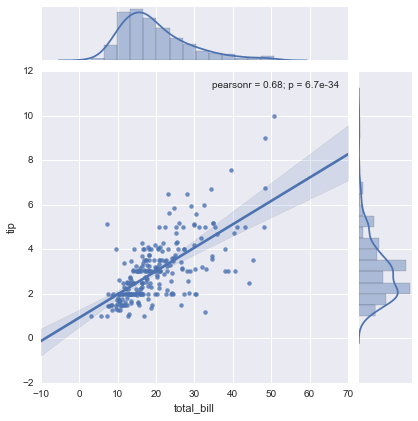

In [126]:
import seaborn as sns

# Load one of the data sets that come with seaborn
tips = sns.load_dataset("tips")

sns.jointplot("total_bill", "tip", tips, kind='reg');

In [ ]:
google.charts.load("current", {packages:['corechart']});

In [51]:
 %%html

    
    <script type="text/javascript" src="https://www.gstatic.com/charts/loader.js"></script>
    <script type="text/javascript">
    google.charts.setOnLoadCallback(drawChart);
    function drawChart() {
      var data = google.visualization.arrayToDataTable([
        ["Element", "Density", { role: "style" } ],
        ["Copper", 8.94, "#b87333"],
        ["Silver", 10.49, "silver"],
        ["Gold", 19.30, "gold"],
        ["Platinum", 21.45, "color: #e5e4e2"]
      ]);

      var view = new google.visualization.DataView(data);
      view.setColumns([0, 1,
                       { calc: "stringify",
                         sourceColumn: 1,
                         type: "string",
                         role: "annotation" },
                       2]);

      var options = {
        title: "Density of Precious Metals, in g/cm^3",
        width: 600,
        height: 400,
        bar: {groupWidth: "95%"},
        legend: { position: "none" },
      };
      var chart = new google.visualization.ColumnChart(document.getElementById("columnchart_values"));
      chart.draw(view, options);
  }
    </script>
<div id="columnchart_values" style="width: 900px; height: 300px;"></div>